In [34]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import sys
sys.path.append('../../src/GLFMpython/')
import GLFM
import graphviz
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
iris_x = iris.data

In [3]:
iris_x.shape

(150, 4)

In [4]:
np.random.shuffle(iris_x)

Let the 4th features of last 20 entries of iris_train_x be missing data. Then replaced these missing data by other entries' mean value.

In [5]:
iris_x_mean = iris_x.copy()

In [6]:
missing_data = iris_x_mean[130:,3].copy()

In [7]:
iris_x_mean[:130,3].mean()

1.1815384615384614

In [8]:
iris_x_mean[130:,3] = 1.1815384615384614

In [9]:
iris_x_mean

array([[4.4       , 3.        , 1.3       , 0.2       ],
       [6.3       , 2.5       , 4.9       , 1.5       ],
       [6.1       , 2.9       , 4.7       , 1.4       ],
       [5.7       , 2.6       , 3.5       , 1.        ],
       [5.6       , 2.7       , 4.2       , 1.3       ],
       [4.9       , 3.1       , 1.5       , 0.1       ],
       [5.5       , 2.4       , 3.7       , 1.        ],
       [4.8       , 3.1       , 1.6       , 0.2       ],
       [6.5       , 3.        , 5.8       , 2.2       ],
       [7.7       , 2.6       , 6.9       , 2.3       ],
       [5.        , 3.3       , 1.4       , 0.2       ],
       [6.4       , 2.8       , 5.6       , 2.1       ],
       [6.1       , 3.        , 4.9       , 1.8       ],
       [6.8       , 3.        , 5.5       , 2.1       ],
       [4.9       , 3.1       , 1.5       , 0.1       ],
       [4.8       , 3.        , 1.4       , 0.3       ],
       [7.7       , 2.8       , 6.7       , 2.        ],
       [6.5       , 3.        ,

Calculate the mean square error.

In [25]:
print("Mean Square Error of Missing data recovered by mean")
np.mean([(missing_data - iris_x_mean[130:,3])**2])

Mean Square Error of Missing data recovered by mean


0.6254023668639053

Make a copy from this data.

In [13]:
iris_x_GLFM = iris_x_mean.copy()

In [15]:
data = {}
data['C'] = 'pppp'
data['X'] = iris_x_GLFM

In [16]:
hidden = dict()
N = len(iris_x_GLFM)
hidden['Z'] = np.random.randint(0,2,size=(N,2)).astype('float64')

In [17]:
params = dict()
params['alpha'] = 2   # concentration parameter for the IBP
params['Niter'] = 100 # number of algorithm iterations
params['maxK'] = 10
params['verbose'] = 0 #do not show messages

In [18]:
hidden = GLFM.infer(data, hidden,params)

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=4, Kest=8, maxR=1


In [19]:
X_map = GLFM.computeMAP(data['C'], hidden['Z'], hidden, params)

In [20]:
X_map.shape

(150, 4)

In [21]:
iris_x_GLFM[130:,3] = X_map[130:,3]

Compute Mean Square Error.

In [24]:
print("Mean Square Error of GLFM processed data")
np.mean([(missing_data - iris_x_GLFM[130:,3])**2])

Mean Square Error of GLFM processed data


0.09384247535880211

In [31]:
MSE_mean = []
MSE_GLFM = []
Missing_number = []
for l in range(5,80,5):
    Missing_number.append(l)
    
    iris_x_mean = iris_x.copy()
    missing_data = iris_x_mean[-l:,3].copy()
    iris_x_mean[-l:,3] = iris_x_mean[:-l,3].mean()
    MSE_mean.append(np.mean([(missing_data - iris_x_mean[-l:,3])**2]))
    
    iris_x_GLFM = iris_x_mean.copy()
    
    data = {}
    data['C'] = 'pppp'
    data['X'] = iris_x_GLFM
    hidden = dict()
    N = len(iris_x_GLFM)
    hidden['Z'] = np.random.randint(0,2,size=(N,2)).astype('float64')
    
    params = dict()
    params['alpha'] = 2   # concentration parameter for the IBP
    params['Niter'] = 100 # number of algorithm iterations
    params['maxK'] = 10
    params['verbose'] = 0 #do not show messages
    
    hidden = GLFM.infer(data, hidden,params)
    X_map = GLFM.computeMAP(data['C'], hidden['Z'], hidden, params)
    iris_x_GLFM[-l:,3] = X_map[-l:,3]
    MSE_GLFM.append(np.mean([(missing_data - iris_x_GLFM[-l:,3])**2]))

In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=4, Kest=8, maxR=1
In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=4, Kest=8, maxR=1
In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=4, Kest=8, maxR=1
In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=4, Kest=8, maxR=1
In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=4, Kest=8, maxR=1
In C++: transforming input data...
done


Entering C++: Running Inference Routine...


Back to Python: OK

B_out[D,Kest,maxR] where D=4, Kest=8, maxR=1
In C++: transforming input data...
done


Entering C++: Running Inference Routine...


B

In [32]:
MSE_mean

[0.44535457788347205,
 0.49153316326530616,
 0.5518902606310014,
 0.6254023668639053,
 0.5909030399999998,
 0.6198472222222223,
 0.5868914933837429,
 0.5905165289256199,
 0.574292970521542,
 0.6265599999999999,
 0.6115527574918156,
 0.5863012345679012,
 0.5657537396859195,
 0.5626285714285716,
 0.5691626666666666]

In [33]:
MSE_GLFM

[0.14007458025546826,
 0.14710678839220578,
 0.2384532791510074,
 0.17084290307935418,
 0.1956430248427284,
 0.37368550490178704,
 0.1886952750834008,
 0.16672457000078644,
 0.1587462157303287,
 0.19579750773676424,
 0.1906478673532671,
 0.5695542849850899,
 0.1729862378322892,
 0.32299940434225155,
 0.21038229495272248]

In [35]:
Missing_number

[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]

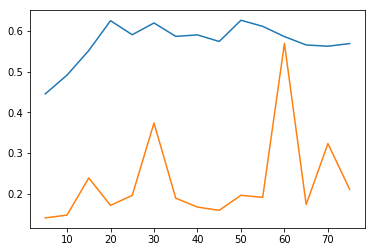

In [43]:
plt.plot(Missing_number,MSE_mean)
plt.plot(Missing_number,MSE_GLFM)